### Please answer below questions using both SQL and Python
1. How many products people usually order?
2. Which products are ordered the most?
3. Which product is most likely to be added first in cart?
4. What is the time at which people usually order products?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(33819106, 3)
(3421083, 6)
(49688, 4)


In [4]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")
aisles_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [5]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")

In [6]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")

In [7]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")

In [8]:
new

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,5,114082,26,0,20,1.0
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,2,119977,2,0,16,3.0
2,1,prepared soups salads,209,Italian Pasta Salad,20,deli,195206,18,1519,7,2,9,5.0
3,1,prepared soups salads,209,Italian Pasta Salad,20,deli,227717,1,161125,7,2,11,11.0
4,1,prepared soups salads,209,Italian Pasta Salad,20,deli,260072,13,12012,5,5,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,100,missing,49669,K Cup Dark Blend,21,missing,1117326,6,194919,2,1,9,30.0
33819102,100,missing,49669,K Cup Dark Blend,21,missing,1199483,5,40639,11,2,9,5.0
33819103,100,missing,49669,K Cup Dark Blend,21,missing,1433832,6,112736,42,1,12,4.0
33819104,100,missing,49669,K Cup Dark Blend,21,missing,1560004,9,94450,1,1,10,NaN


1. How many products people usually order?

In [22]:
order_products.groupby('order_id')['order_id'].value_counts().median() 

8.0

In [20]:
order_products.groupby('order_id')['order_id'].size().median()  #计数

8.0

In [21]:
new.groupby(['user_id'])['order_id'].value_counts().median()

8.0

People usually buy 8 products.

2. Which products are ordered the most?

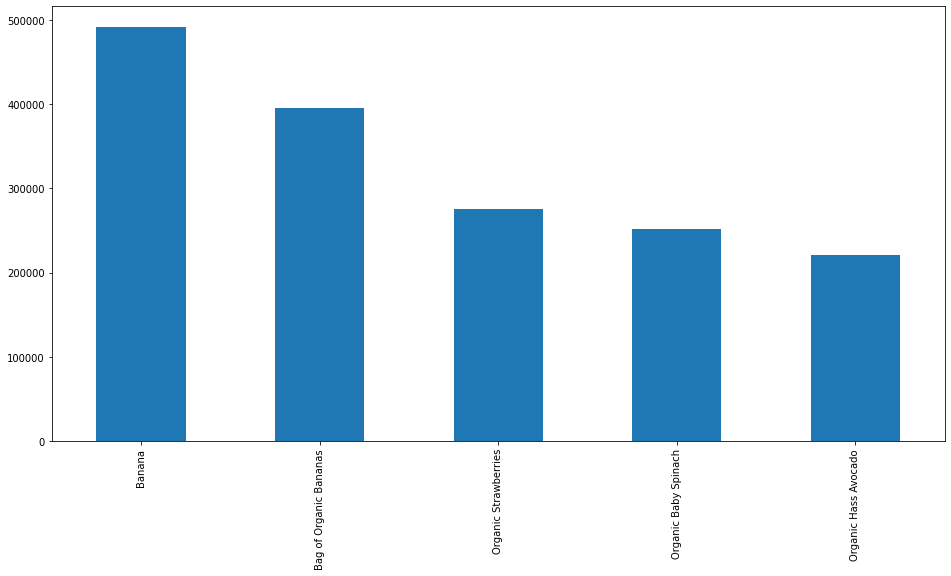

In [14]:
plt.figure(figsize=(16,8))
new['product_name'].value_counts().head(5).plot.bar()
plt.show()

Banana is the product that customers order most.

3. Which product is most likely to be added first in cart?

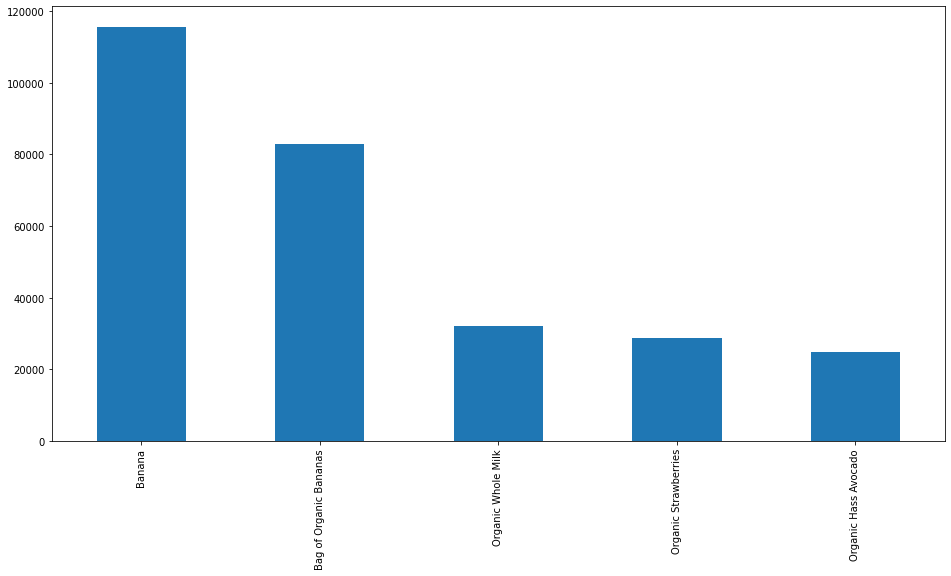

In [15]:
# 满足 add_to_cart_order= 1 的 max(count(product_id))
new2 = new[new['add_to_cart_order'] <= 1]

plt.figure(figsize=(16,8))
new2['product_name'].value_counts().head(5).plot.bar()
plt.show()

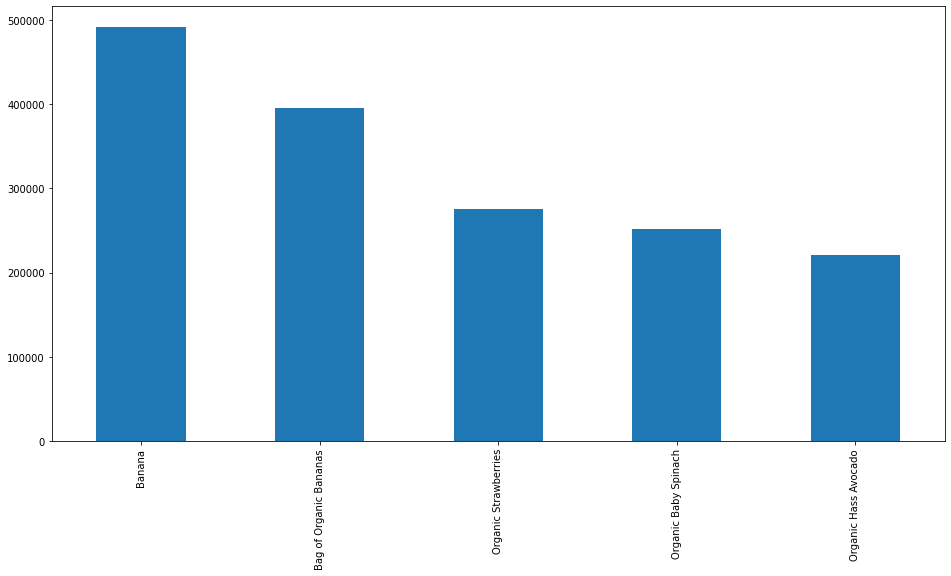

In [16]:
plt.figure(figsize=(16,8))
new['product_name'].value_counts().head(5).plot.bar()
plt.show()

Banana is most likely to be added first in cart. 

4. What is the time at which people usually order products?


In [33]:
# order_dow
new['order_dow'].describe

<bound method NDFrame.describe of 0           0
1           0
2           2
3           2
4           5
           ..
33819101    1
33819102    2
33819103    1
33819104    1
33819105    4
Name: order_dow, Length: 33819106, dtype: int64>

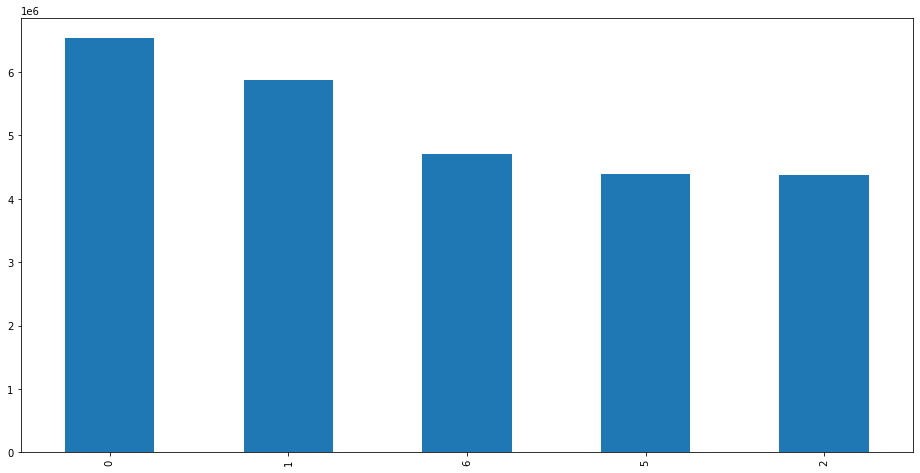

In [34]:
plt.figure(figsize=(16,8))
new['order_dow'].value_counts().head(5).plot.bar()
plt.show()

People usually order on Sunday.

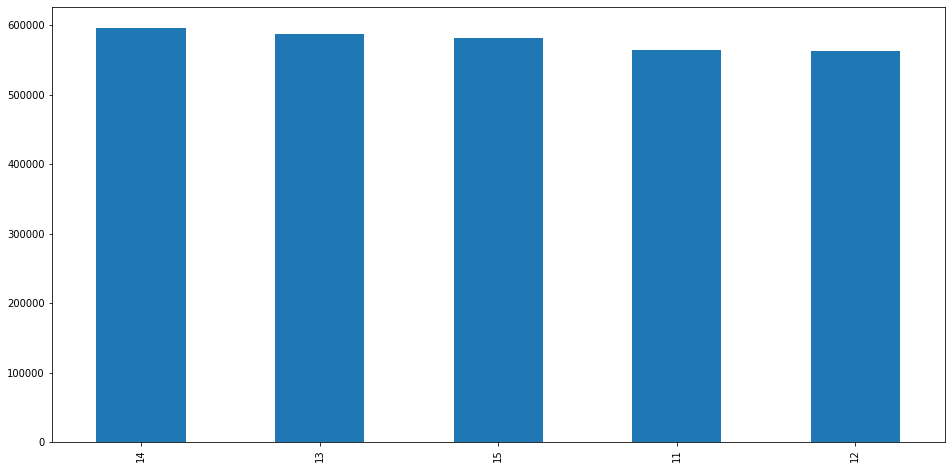

In [35]:
new3 = new[new['order_dow'] == 0]
plt.figure(figsize=(16,8))
new3['order_hour_of_day'].value_counts().head(5).plot.bar()
plt.show()

People usually order on Sunday at 14:00 O'clock.

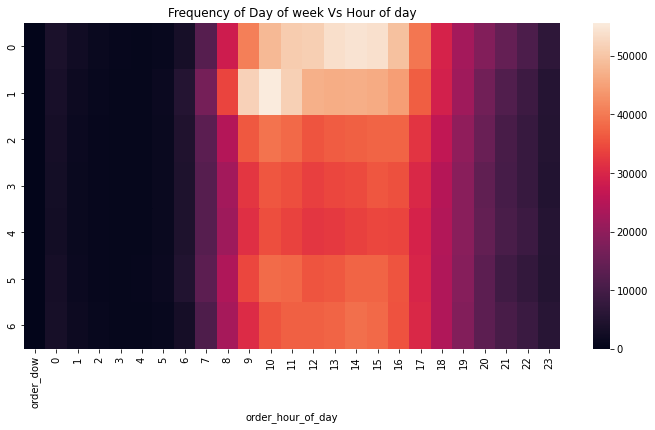

In [9]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate(["count"]).reset_index()
grouped = grouped.pivot_table('count', 'order_dow', 'order_hour_of_day').reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(grouped)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

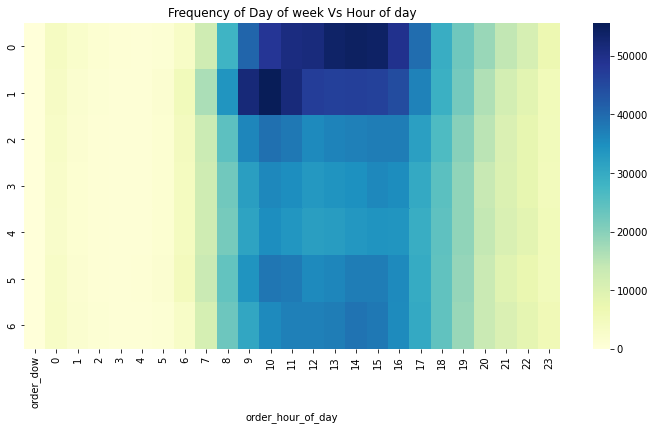

In [10]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate(["count"]).reset_index()
grouped = grouped.pivot_table('count', 'order_dow', 'order_hour_of_day').reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(grouped, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()